In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from statsmodels.tsa.arima_process import ArmaProcess
from pmdarima.arima import ndiffs
import pmdarima as pm
from pylab import rcParams
import statsmodels.api as sm
import warnings
import itertools
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA

In [9]:
data = pd.read_csv('c:/temp/Cleaned_dataset_P&B.csv', parse_dates=['DATE'], index_col=["DATE"])
pd.set_option('display.max_rows', None)
data

NAICS_DESC            anonimized_name  \
DATE                                                                    
2020-10-20              Offices of Lawyers           Aaron Walker INC   
2020-11-12              Offices of Lawyers           Aaron Walker INC   
2020-11-13              Offices of Lawyers           Aaron Walker INC   
2020-11-30              Offices of Lawyers           Aaron Walker INC   
2020-12-01              Offices of Lawyers           Aaron Walker INC   
2020-12-02              Offices of Lawyers           Aaron Walker INC   
2020-12-03              Offices of Lawyers           Aaron Walker INC   
2020-12-04              Offices of Lawyers           Aaron Walker INC   
2020-12-07              Offices of Lawyers           Aaron Walker INC   
2020-12-08              Offices of Lawyers           Aaron Walker INC   
2020-12-09              Offices of Lawyers           Aaron Walker INC   
2020-12-10              Offices of Lawyers           Aaron Walker INC   
2020-12-11              Offices of Lawyers           Aaron Walker INC   
2020-12-14              Offices of Lawyers           Aaron Walker INC   
2020-12-15              Offices of Lawyers           Aaron Walker INC   
2020-12-16              Offices of Lawyers           Aaron Walker INC   
2020-12-17              Offices of Lawyers           Aaron Walker INC   
2020-12-18              Offices of Lawyers           Aaron Walker INC   
2020-12-21              Offices of Lawyers           Aaron Walker INC   
2020-12-22              Offices of Lawyers           Aaron Walker INC   
2020-12-23              Offices of Lawyers           Aaron Walker INC   
2020-12-28              Offices of Lawyers           Aaron Walker INC   
2020-12-29              Offices of Lawyers           Aaron Walker INC   
2020-12-30              Offices of Lawyers           Aaron Walker INC   
2020-12-31              Offices of Lawyers           Aaron Walker INC   
2021-01-04              Offices of Lawyers           Aaron Walker INC   
2021-01-05              Offices of Lawyers           Aaron Walker INC   
2021-01-06              Offices of Lawyers           Aaron Walker INC   
2021-01-07              Offices of Lawyers           Aaron Walker INC   
2021-01-08              Offices of Lawyers           Aaron Walker INC   
2021-01-11              Offices of Lawyers           Aaron Walker INC   
2021-01-12              Offices of Lawyers           Aaron Walker INC   
2021-01-13              Offices of Lawyers           Aaron Walker INC   
2021-01-14              Offices of Lawyers           Aaron Walker INC   
2021-01-15              Offices of Lawyers           Aaron Walker INC   
2021-01-19              Offices of Lawyers           Aaron Walker INC   
2021-01-20              Offices of Lawyers           Aaron Walker INC   
2021-01-21              Offices of Lawyers           Aaron Walker INC   
2021-01-22              Offices of Lawyers           Aaron Walker INC   
2021-01-25              Offices of Lawyers           Aaron Walker INC   
2021-01-26              Offices of Lawyers           Aaron Walker INC   
2021-01-27              Offices of Lawyers           Aaron Walker INC   
2021-01-28              Offices of Lawyers           Aaron Walker INC   
2021-01-29              Offices of Lawyers           Aaron Walker INC   
2021-02-01              Offices of Lawyers           Aaron Walker INC   
2021-02-02              Offices of Lawyers           Aaron Walker INC   
2021-02-03              Offices of Lawyers           Aaron Walker INC   
2021-02-04              Offices of Lawyers           Aaron Walker INC   
2021-02-05              Offices of Lawyers           Aaron Walker INC   
2021-02-08              Offices of Lawyers           Aaron Walker INC   
2021-02-09              Offices of Lawyers           Aaron Walker INC   
2021-02-10              Offices of Lawyers           Aaron Walker INC   
2021-02-11              Offices of Lawyers           Aaron Walker INC   
2021-02-12       

In [10]:
data.fillna('Not Available', inplace = True)

In [11]:
unique_clients = data['anonimized_name'].unique()

In [12]:
#removing outliers for every client
for i in unique_clients:
    client_name = data[data['anonimized_name'] == i]
    Q1 = np.percentile(client_name['total_revenue'], 25, interpolation = 'midpoint')
    Q3 = np.percentile(client_name['total_revenue'], 75, interpolation = 'midpoint')
    IQR = Q3 - Q1
    upper=Q3+1.5*IQR
    upper_array=np.array(client_name['total_revenue']>=upper)
    lower=Q1-1.5*IQR
    lower_array=np.array(client_name['total_revenue']<=lower)
    client_name['upper_array'] = upper_array
    client_name['lower_array'] = lower_array
    client_name = client_name[client_name['upper_array'] == False]
    client_name = client_name[client_name['lower_array'] == False]
    client_name = client_name.drop(['lower_array','upper_array'], axis=1)
    data = data.append(client_name.iloc[:,1:3])

C:\Users\hyeji\AppData\Local\Temp\ipykernel_20756\3386606353.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  client_name['upper_array'] = upper_array
C:\Users\hyeji\AppData\Local\Temp\ipykernel_20756\3386606353.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  client_name['lower_array'] = lower_array
C:\Users\hyeji\AppData\Local\Temp\ipykernel_20756\3386606353.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

In [13]:
df2 = data.loc[data['anonimized_name']=="Jason Brown INC"]
df2

NAICS_DESC  anonimized_name  total_revenue
DATE                                                          
2021-08-26  Commercial Banking  Jason Brown INC             21
2021-08-27  Commercial Banking  Jason Brown INC            217
2021-08-30  Commercial Banking  Jason Brown INC            951
2021-08-31  Commercial Banking  Jason Brown INC           1251
2021-09-01  Commercial Banking  Jason Brown INC            947
2021-09-02  Commercial Banking  Jason Brown INC           1136
2021-09-03  Commercial Banking  Jason Brown INC            872
2021-09-07  Commercial Banking  Jason Brown INC            929
2021-09-08  Commercial Banking  Jason Brown INC           1807
2021-09-09  Commercial Banking  Jason Brown INC            848
2021-09-10  Commercial Banking  Jason Brown INC            661
2021-09-13  Commercial Banking  Jason Brown INC            594
2021-09-14  Commercial Banking  Jason Brown INC            805
2021-09-15  Commercial Banking  Jason Brown INC            776
2021-09-16  Commercial Banking  Jason Brown INC            864
2021-09-17  Commercial Banking  Jason Brown INC           1100
2021-09-20  Commercial Banking  Jason Brown INC            736
2021-09-21  Commercial Banking  Jason Brown INC           1379
2021-09-22  Commercial Banking  Jason Brown INC           1130
2021-09-23  Commercial Banking  Jason Brown INC           1334
2021-09-24  Commercial Banking  Jason Brown INC            828
2021-09-27  Commercial Banking  Jason Brown INC           1121
2021-09-28  Commercial Banking  Jason Brown INC           1172
2021-09-29  Commercial Banking  Jason Brown INC           1158
2021-09-30  Commercial Banking  Jason Brown INC            900
2021-10-01  Commercial Banking  Jason Brown INC            751
2021-10-04  Commercial Banking  Jason Brown INC           1153
2021-10-05  Commercial Banking  Jason Brown INC            827
2021-10-06  Commercial Banking  Jason Brown INC           1347
2021-10-07  Commercial Banking  Jason Brown INC           1459
2021-10-08  Commercial Banking  Jason Brown INC            795
2021-10-11  Commercial Banking  Jason Brown INC           1322
2021-10-12  Commercial Banking  Jason Brown INC            945
2021-10-13  Commercial Banking  Jason Brown INC           1127
2021-10-14  Commercial Banking  Jason Brown INC           1138
2021-10-15  Commercial Banking  Jason Brown INC           1096
2021-10-18  Commercial Banking  Jason Brown INC            866
2021-10-19  Commercial Banking  Jason Brown INC           1110
2021-10-20  Commercial Banking  Jason Brown INC            917
2021-10-21  Commercial Banking  Jason Brown INC           1033
2021-10-22  Commercial Banking  Jason Brown INC            913
2021-10-25  Commercial Banking  Jason Brown INC           1045
2021-10-26  Commercial Banking  Jason Brown INC           1566
2021-10-27  Commercial Banking  Jason Brown INC           1036
2021-10-28  Commercial Banking  Jason Brown INC           1363
2021-10-29  Commercial Banking  Jason Brown INC            811
2021-10-30  Commercial Banking  Jason Brown INC             96
2021-11-02  Commercial Banking  Jason Brown INC           1088
2021-11-03  Commercial Banking  Jason Brown INC            957
2021-11-04  Commercial Banking  Jason Brown INC           1057
2021-11-05  Commercial Banking  Jason Brown INC            838
2021-11-07  Commercial Banking  Jason Brown INC             27
2021-11-08  Commercial Banking  Jason Brown INC           1614
2021-11-09  Commercial Banking  Jason Brown INC           1764
2021-11-10  Commercial Banking  Jason Brown INC           1249
2021-11-12  Commercial Banking  Jason Brown INC            817
2021-11-15  Commercial Banking  Jason Brown INC           1008
2021-11-16  Commercial Banking  Jason Brown INC           1937
2021-11-17  Commercial Banking  Jason Brown INC            857
2021-11-18  Commercial Banking  Jason Brown INC            911
2021-11-19  Commercial Banking  Jason Brown INC           1291
2021-11-22  Commercial Banking  Jason Brown INC    

<AxesSubplot:xlabel='DATE'>

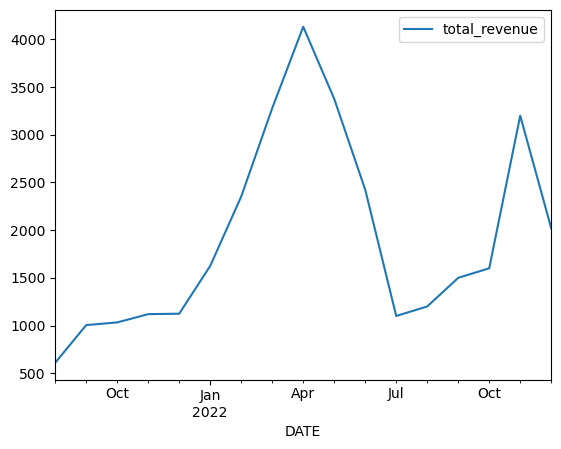

In [14]:
df3 = df2.resample('MS').mean().dropna(inplace=False)
df3.plot()

In [15]:
df2_sample = df2.drop(['NAICS_DESC','anonimized_name'],axis =1)
df2_sample

total_revenue
DATE                     
2021-08-26             21
2021-08-27            217
2021-08-30            951
2021-08-31           1251
2021-09-01            947
2021-09-02           1136
2021-09-03            872
2021-09-07            929
2021-09-08           1807
2021-09-09            848
2021-09-10            661
2021-09-13            594
2021-09-14            805
2021-09-15            776
2021-09-16            864
2021-09-17           1100
2021-09-20            736
2021-09-21           1379
2021-09-22           1130
2021-09-23           1334
2021-09-24            828
2021-09-27           1121
2021-09-28           1172
2021-09-29           1158
2021-09-30            900
2021-10-01            751
2021-10-04           1153
2021-10-05            827
2021-10-06           1347
2021-10-07           1459
2021-10-08            795
2021-10-11           1322
2021-10-12            945
2021-10-13           1127
2021-10-14           1138
2021-10-15           1096
2021-10-18            866
2021-10-19           1110
2021-10-20            917
2021-10-21           1033
2021-10-22            913
2021-10-25           1045
2021-10-26           1566
2021-10-27           1036
2021-10-28           1363
2021-10-29            811
2021-10-30             96
2021-11-02           1088
2021-11-03            957
2021-11-04           1057
2021-11-05            838
2021-11-07             27
2021-11-08           1614
2021-11-09           1764
2021-11-10           1249
2021-11-12            817
2021-11-15           1008
2021-11-16           1937
2021-11-17            857
2021-11-18            911
2021-11-19           1291
2021-11-22            701
2021-11-23            943
2021-11-24           3708
2021-11-26            614
2021-11-28             17
2021-11-29            744
2021-11-30           1362
2021-12-01           1896
2021-12-02           1458
2021-12-03           1317
2021-12-06           1062
2021-12-07            919
2021-12-08            597
2021-12-09            947
2021-12-10            827
2021-12-13           1055
2021-12-14           3881
2021-12-15            899
2021-12-16           1009
2021-12-17           1296
2021-12-20           1027
2021-12-21           1019
2021-12-22            888
2021-12-23            936
2021-12-24            383
2021-12-27           1019
2021-12-28           1112
2021-12-29           1398
2021-12-30            516
2021-12-31            390
2022-01-03           1464
2022-01-04            918
2022-01-05           1636
2022-01-06           1445
2022-01-07            877
2022-01-10           1359
2022-01-11           1319
2022-01-12           2487
2022-01-13           1555
2022-01-14           1287
2022-01-17            133
2022-01-18           1708
2022-01-19           1352
2022-01-20           1443
2022-01-21           1768
2022-01-24           1926
2022-01-25           2858
2022-01-26           2064
2022-01-27           2331
2022-01-28           1337
2022-01-31           2863
2022-02-01           2870
2022-02-02           2130
2022-02-03           1526
2022-02-04           1311
2022-02-07           1819
2022-02-08           2761
2022-02-09           2578
2022-02-10           2110
2022-02-11           2090
2022-02-14           2010
2022-02-15           6459
2022-02-16           2302
2022-02-17           2636
2022-02-18           3343
2022-02-19             57
2022-02-21            722
2022-02-22           2817
2022-02-23           2317
2022-02-24           2438
2022-02-25           2736
2022-02-28           2368
2022-03-01           2396
2022-03-02           2725
2022-03-03           2624
2022-03-04           3572
2022-03-05            103
2022-03-07           2918
2022-03-08           4142
2022-03-09           4371
2022-03-10           5014
2022-03-11           1797
2022-03-12            270
2022-03-14           3044
2022-03-15           1964
2022-03-16           2644
2022-03-17           2093
2022-03-18           4697
2022-03-19            260
2022-03-21           3108
2022-03-22           4516
2022-03-

In [16]:
split = '2022-06-30'
revenue_train = df2_sample[:split]
revenue_test = df2_sample[split:]
revenue_test_final = revenue_test.copy()

In [17]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(revenue_train)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))

ADF Statistic: -3.038380
p-value: 0.031462
Critical Values:
	1%: -3.444
	5%: -2.868
	10%: -2.570


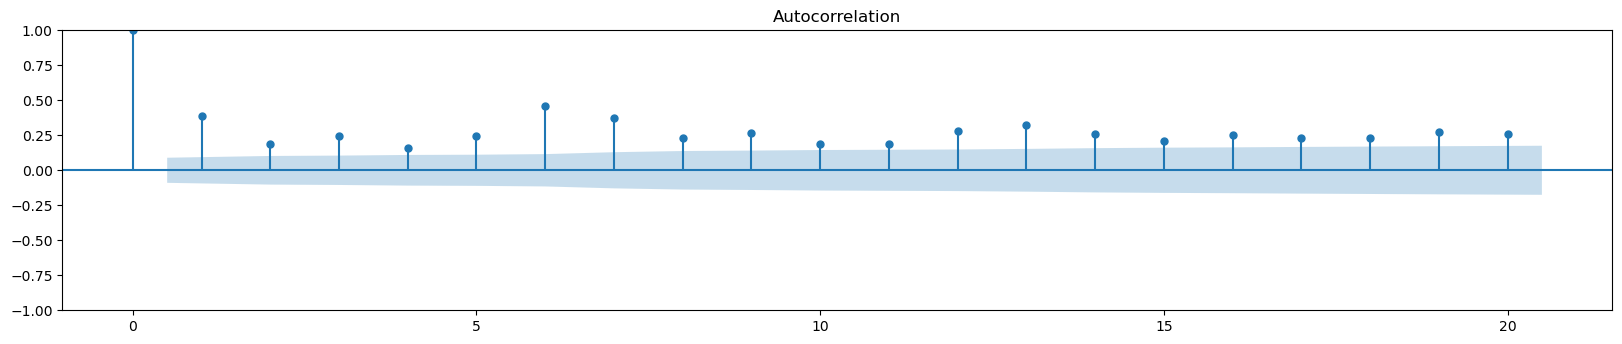

In [18]:
#ACF graph for Stationarity
import statsmodels.api as sm
fig=plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(revenue_train, lags=20, ax=ax1)

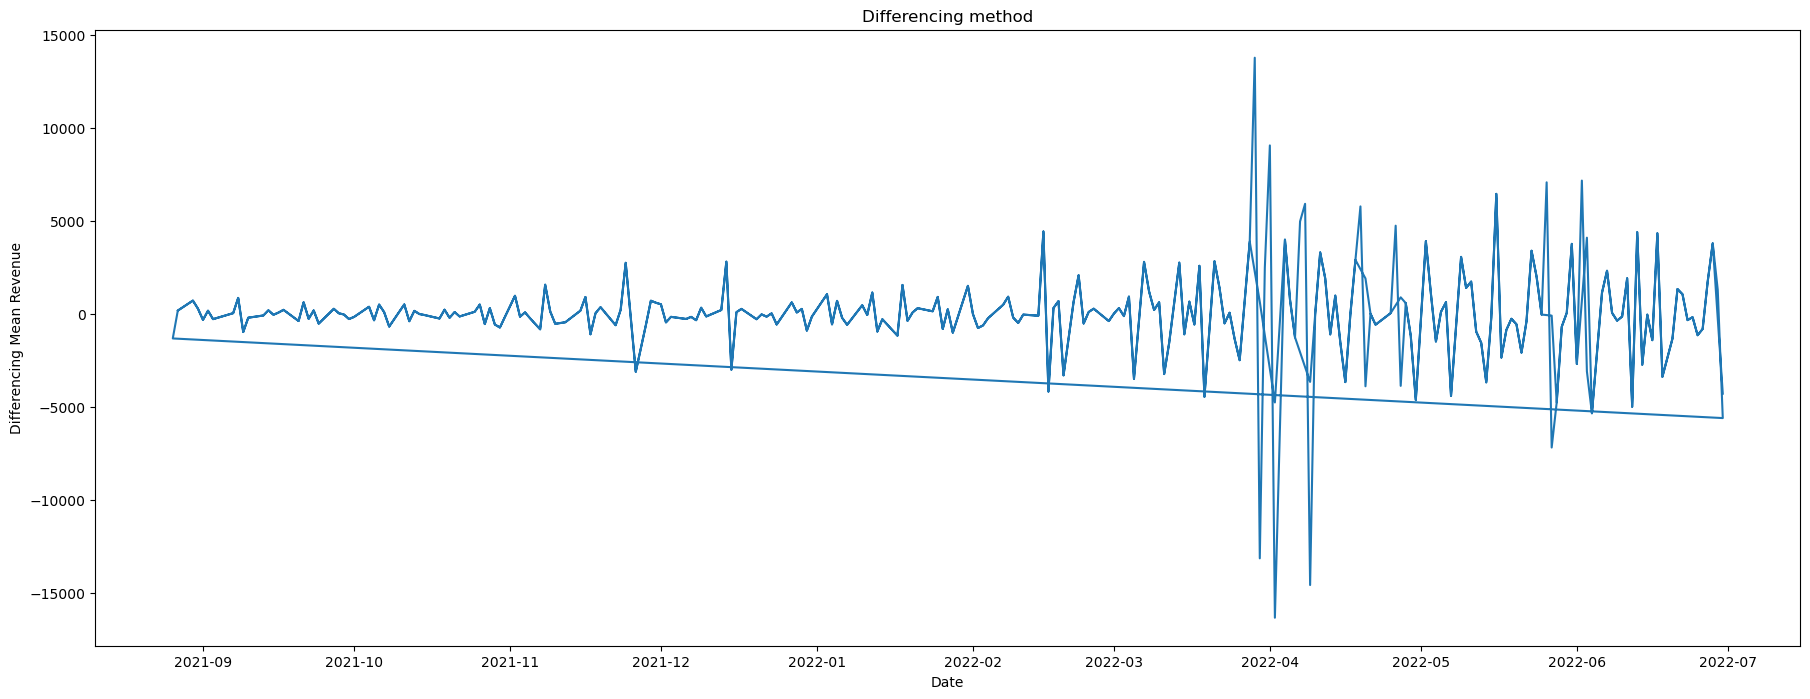

In [19]:
df2_sample_diff = revenue_train - revenue_train.shift()
plt.figure(figsize=(22,8))
plt.plot(df2_sample_diff)
plt.title("Differencing method")
plt.xlabel("Date")
plt.ylabel("Differencing Mean Revenue")
plt.show()

In [20]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df2_sample_diff[1:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))

ADF Statistic: -13.495018
p-value: 0.000000
Critical Values:
	1%: -3.444
	5%: -2.868
	10%: -2.570


C:\Users\hyeji\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


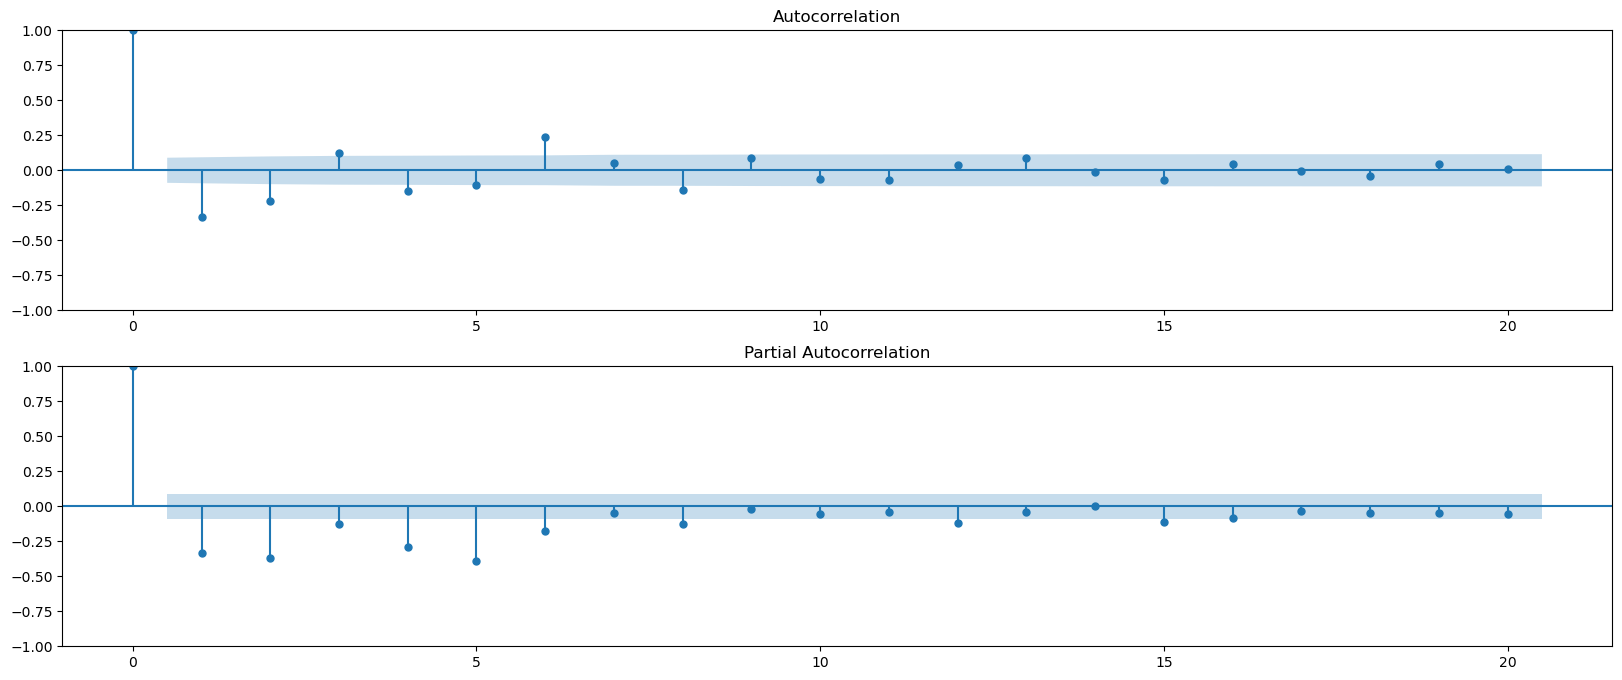

In [21]:
#ACF, PACF graph for Stationarity
import statsmodels.api as sm
fig= plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df2_sample_diff[1:], lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df2_sample_diff[1:], lags=20, ax=ax2)

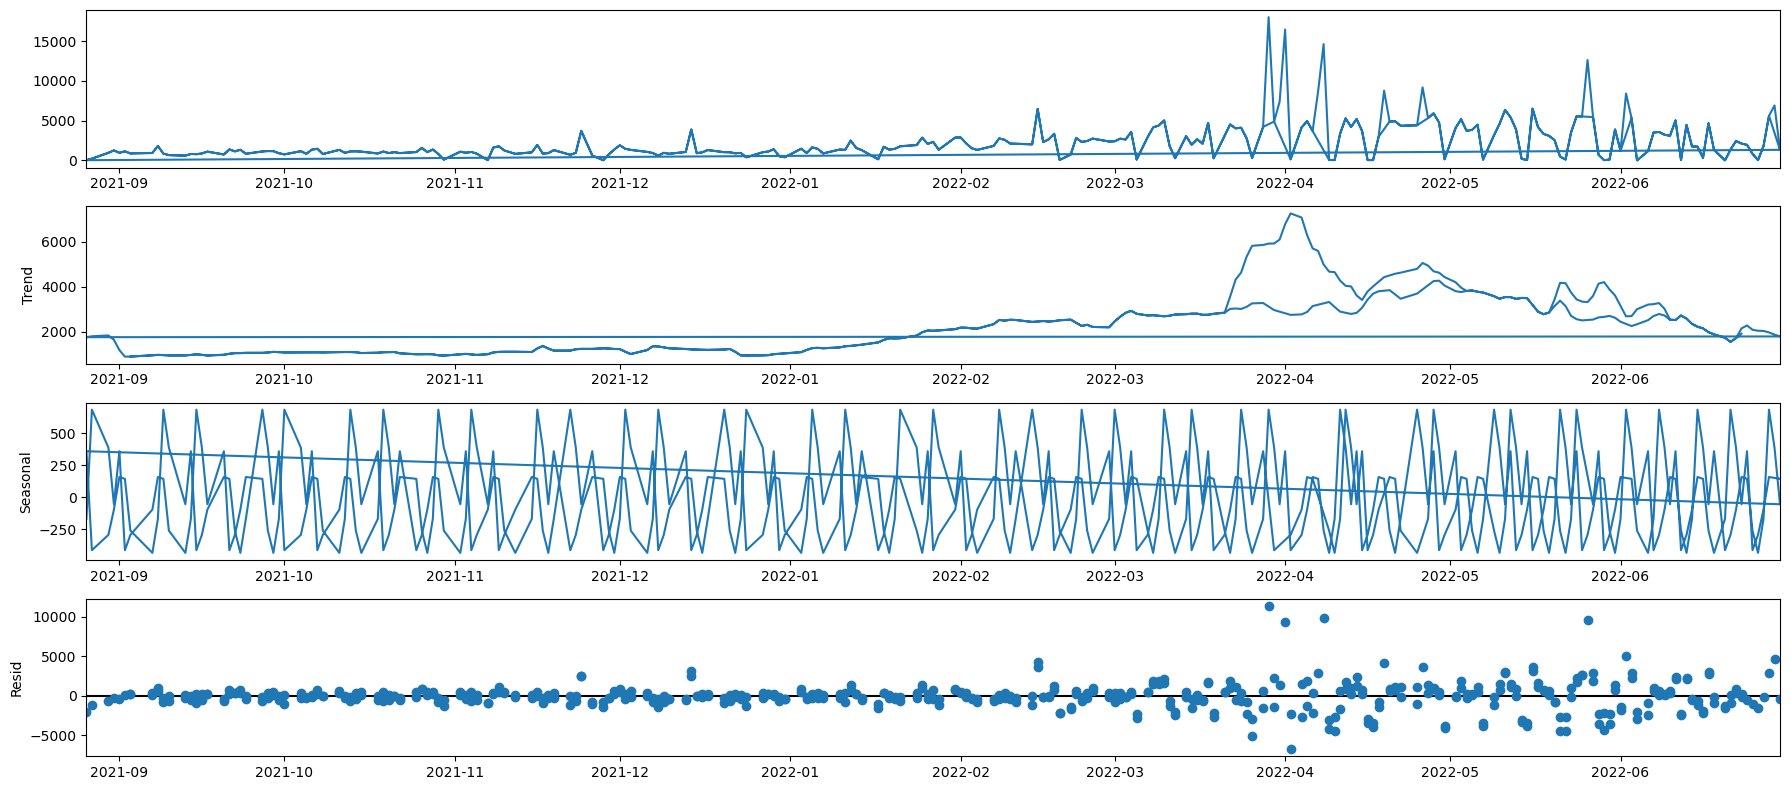

In [22]:
rcParams['figure.figsize'] = (18, 8)
decomposition = sm.tsa.seasonal_decompose(revenue_train, model='additive',period=12)
fig = decomposition.plot()
plt.show()

In [23]:
from pmdarima import auto_arima
stepwise_model = auto_arima(revenue_train, start_p=1, start_q=1,
                           max_p=5, max_q=5, m=12,
                           start_P=0, seasonal=False,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

C:\Users\hyeji\anaconda3\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8540.397, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8761.704, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8707.508, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8548.630, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8759.706, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8529.886, Time=0.42 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=8639.456, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=8533.357, Time=0.50 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8530.464, Time=0.39 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8550.213, Time=0.31 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=8633.668, Time=0.05 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=8532.184, Time=0.39 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=8528.001, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=8538.546, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0]          

In [26]:
df2_sample_1 = df2_sample.reset_index()

In [27]:
df2_sample_2 = df2_sample_1.set_index('DATE').resample('M').mean()

In [28]:
df2_sample_3 = df2_sample_2.reset_index()

C:\Users\hyeji\AppData\Local\Temp\ipykernel_20756\557514814.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
C:\Users\hyeji\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\hyeji\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


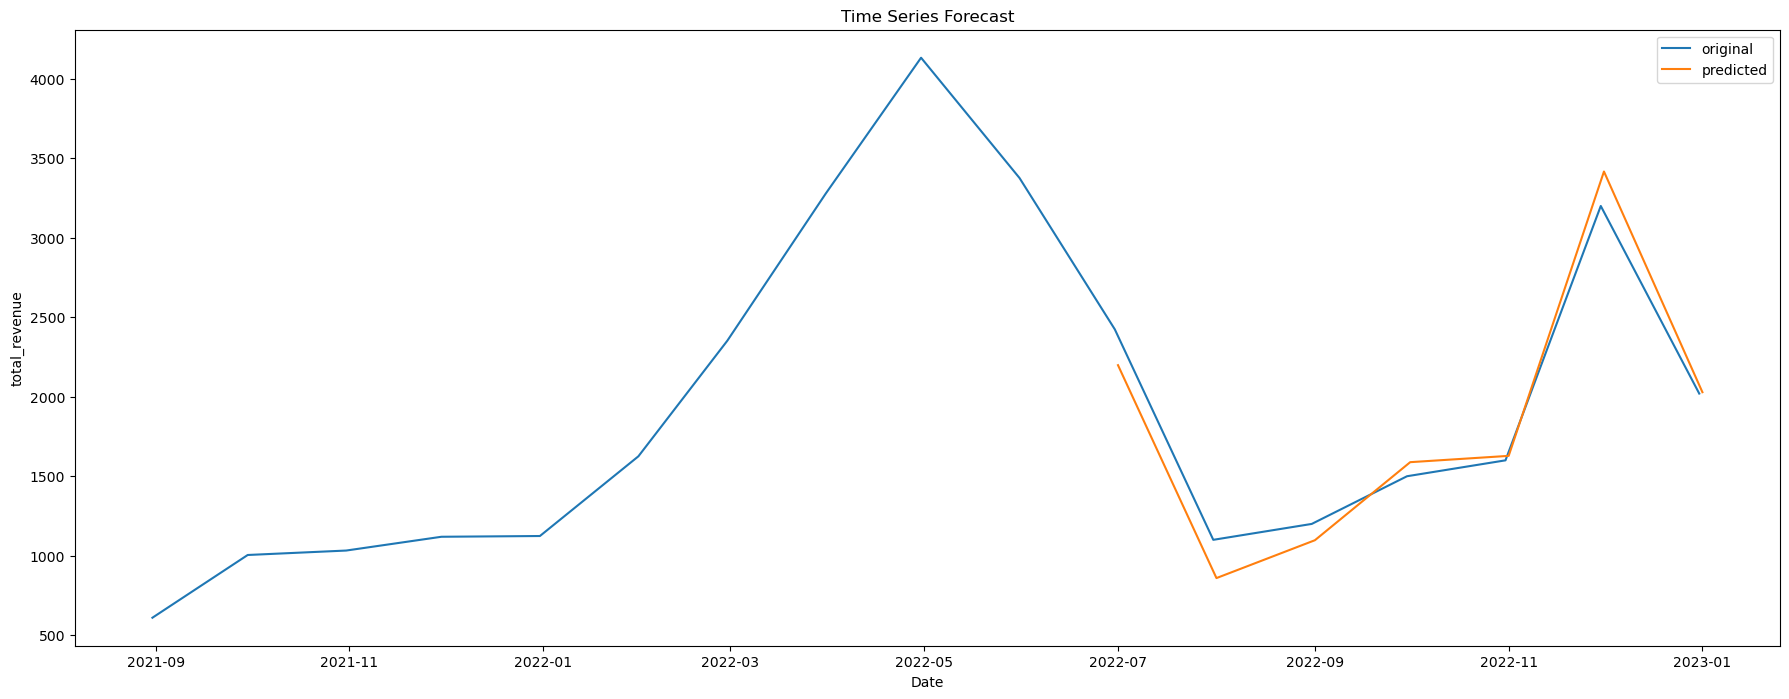

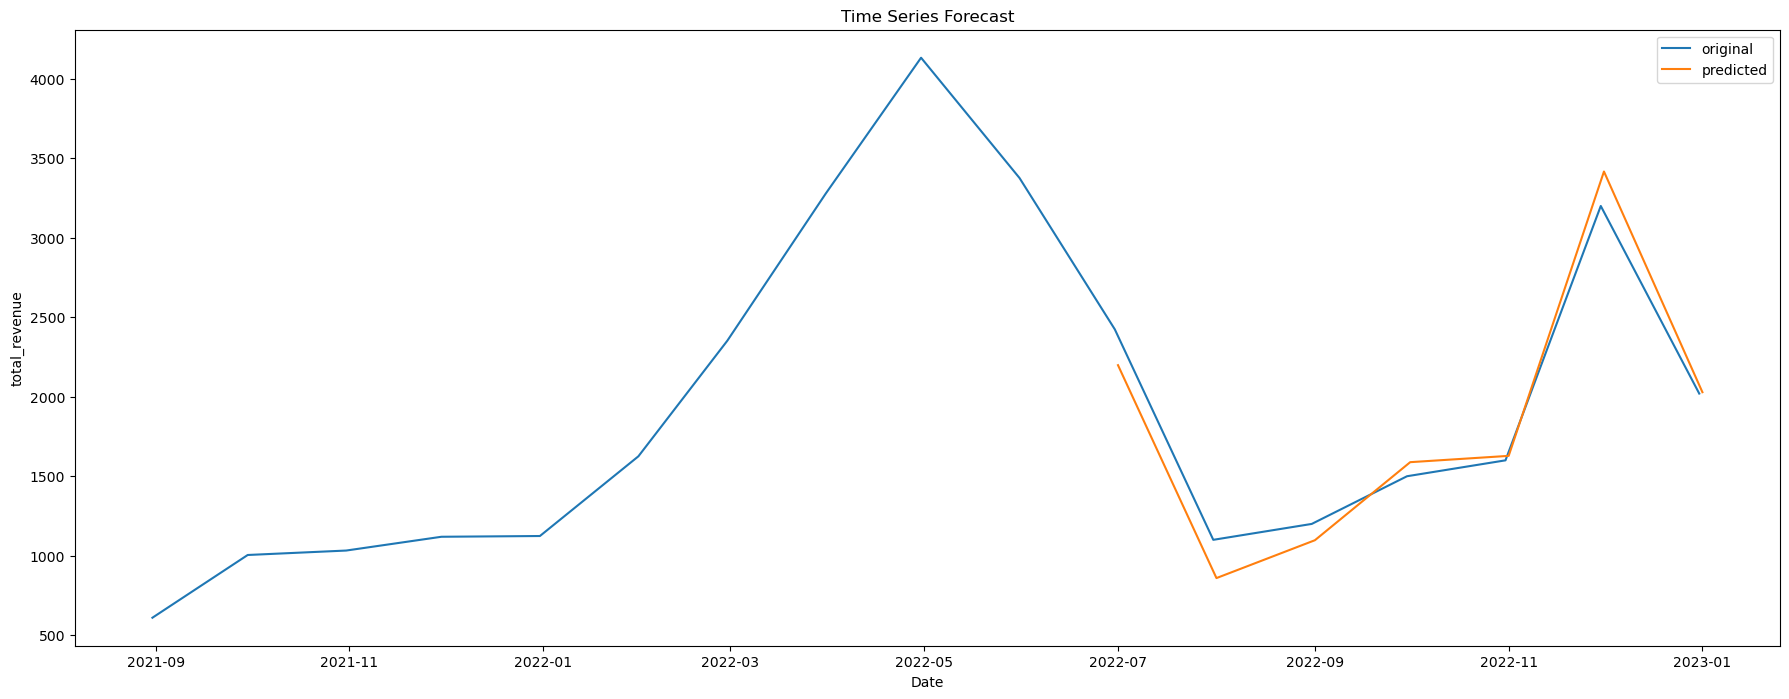

In [39]:
from statsmodels.tsa.arima.model import ARIMA
from pandas import datetime
import statsmodels.api as smapi

#fit model
#model = smapi.tsa.arima.ARIMA(df2_sample, order=(0,1,1))
#model_fit = model.fit()

model = sm.tsa.arima.ARIMA(df3['total_revenue'], order=(2,1,1))
model=model.fit()
model.summary()

#predict
start_index = datetime(2022, 7, 1)
end_index = datetime(2022, 12, 30)
forecast = model.predict(start=start_index, end=end_index, typ='levels')

plt.figure(figsize=(22,8))
plt.plot(df2_sample_3.DATE,df2_sample_3.total_revenue,label="original")
plt.plot(forecast, label="predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("total_revenue")
plt.legend()
plt.show(0)

In [40]:
forecast = forecast.resample('MS').mean()
forecast

2022-07-01    2198.637461
2022-08-01     859.362233
2022-09-01    1097.501650
2022-10-01    1588.465125
2022-11-01    1628.143247
2022-12-01    3416.718328
2023-01-01    2028.625382
Freq: MS, Name: predicted_mean, dtype: float64

In [41]:
df3['total_revenue'].mean()

1923.4528507421417

In [42]:
forecast.shape

(7,)

In [43]:
df3['total_revenue'].shape

(17,)

In [45]:
df4 = df3['total_revenue'].iloc[10:]

In [46]:
#Root mean squared error
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(forecast,df4))
print(rmse)

158.0431136522458
